In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('creditcard.csv')

## First look at data

In [ ]:
print(df.info())
df.head()

## EDA

## Scaling

In [ ]:
plt.figure(figsize = (15, 9))

plt.subplot(211)
sns.histplot(df['Time'], kde=True, bins = 50)

plt.subplot(212)
sns.histplot(df['Amount'], kde=True, bins = 50)

plt.show()

In [2]:
from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()

df['Amount_scaled'] = robustScaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time_scaled'] = robustScaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
plt.figure(figsize = (15, 9))

plt.subplot(211)
sns.histplot(df['Time_scaled'], kde=True, bins = 50)

plt.subplot(212)
sns.histplot(df['Amount_scaled'], kde=True, bins = 50)

plt.show()

## Splitting the data

In [ ]:
print('Non fraud: ', df['Class'].value_counts()[0] / len(df['Class']))

In [3]:
X = df.drop('Class', axis=1)
y = df['Class']

from sklearn.model_selection import StratifiedKFold
stratifiedKFold = StratifiedKFold(n_splits=5)

for train_index, test_index in stratifiedKFold.split(X, y):
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]

print('Train non fraud: ', np.unique(ytrain, return_counts=True)[1][0] / len(ytrain))
print('Test non fraud: ', np.unique(ytest, return_counts=True)[1][0] / len(ytest))

Train non fraud:  0.9982707618303591
Test non fraud:  0.9982795245869981


In [9]:
train = pd.concat([Xtrain, ytrain], axis=1)
train = train.sample(frac=1, random_state=42)

train_fraud = train.loc[train['Class'] == 1]
train_non_fraud = train.loc[train['Class'] == 0][:np.sum(train['Class'] == 1)]

train_undersampled = pd.concat([train_fraud, train_non_fraud]).sample(frac=1, random_state=43)

Xtrain_undersampled = train_undersampled.drop('Class', axis=1)
ytrain_undersampled = train_undersampled['Class']

print('Underampled train non fraud: ', np.unique(ytrain_undersampled, return_counts=True)[1][0] / len(ytrain_undersampled))

Underampled train non fraud:  0.5


## Anomaly Detection

## Dimensionality Reduction, Clustering

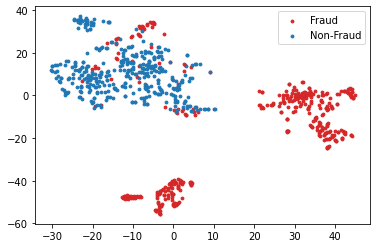

In [50]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42).fit_transform(Xtrain_undersampled.values)

plt.scatter(tsne[:,0][ytrain_undersampled == 1], tsne[:,1][ytrain_undersampled == 1], c='tab:red', s=8, label='Fraud')
plt.scatter(tsne[:,0][ytrain_undersampled == 0], tsne[:,1][ytrain_undersampled == 0], c='tab:blue', s=8, label='Non-Fraud')
plt.legend()
plt.show()

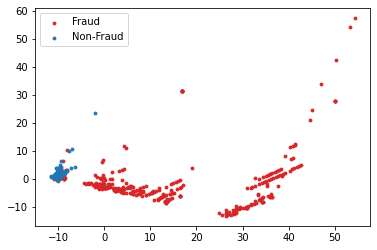

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42).fit_transform(Xtrain_undersampled.values)

plt.scatter(pca[:,0][ytrain_undersampled == 1], pca[:,1][ytrain_undersampled == 1], c='tab:red', s=8, label='Fraud')
plt.scatter(pca[:,0][ytrain_undersampled == 0], pca[:,1][ytrain_undersampled == 0], c='tab:blue', s=8, label='Non-Fraud')
plt.legend()
plt.show()